<a href="https://colab.research.google.com/github/daratourt/A-Two-Way-ANOVA-Analysis-of-Trends-in-Minnesota-s-County-Level-Waste-Management-from-1991-to-2017/blob/main/GrabTakeHomeCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [9]:
from google.colab import files
uploaded = files.upload()

Saving casestudy_dataset_mkpbi_analyst.xlsx to casestudy_dataset_mkpbi_analyst (1).xlsx


In [10]:
# Load Dataset
file_path = 'casestudy_dataset_mkpbi_analyst.xlsx'
# Use pd.read_excel to read Excel files instead of pd.read_csv
df = pd.read_excel(file_path)
display(df.head())

,hour_local,pickup_area,dropoff_area,booking_state,driver_incentive_khr,trip_distance_km,trip_time_mins,eta_mins,ignored_drivers
0,16,PNH.TK- Phsar Depo,PNH.TK- Tuek Lak,COMPLETED,300,1.003000,3.866667,1.800000,4
1,16,PNH.CKM-BKK1,PNH.CKM-Tonle Basak,COMPLETED,350,1.566000,5.433333,0.383333,4
2,15,PNH.CMK-Mittapheap,PNH.DP-Phsar Kandal 1,COMPLETED,900,6.926000,23.600000,0.266667,6
3,17,PNH.DP-Phsar Thmei,PNH.MC-Chak Angre Leu,COMPLETED,670,3.967000,12.850000,2.183333,4
4,17,PNH.CMK-Orussey,PNH.DP-Phsar Kandal 1,CANCELLED_PASSENGER,420,1.570065,5.200000,1.733333,3


# Check the shape of the dataset (#Rows, #Columns)

In [12]:
# Check the shape of the dataset (#Rows, #Columns)
print("Shape of the dataset:")
print(df.shape)

Shape of the dataset:
(9894, 9)


# Check Dataset Information

In [11]:
# Check Dataset Information
print("Dataset Information:")
print(df.info)

Dataset Information:
<bound method DataFrame.info of       hour_local            pickup_area            dropoff_area  \
0             16     PNH.TK- Phsar Depo        PNH.TK- Tuek Lak   
1             16           PNH.CKM-BKK1     PNH.CKM-Tonle Basak   
2             15     PNH.CMK-Mittapheap   PNH.DP-Phsar Kandal 1   
3             17     PNH.DP-Phsar Thmei   PNH.MC-Chak Angre Leu   
4             17        PNH.CMK-Orussey   PNH.DP-Phsar Kandal 1   
...          ...                    ...                     ...   
9889          18    PNH.RSK-Tuol Sangke  PNH.MC-Steung Meanchey   
9890          16     PNH.CMK-Mittapheap   PNH.DP-Phsar Kandal 2   
9891          18  PNH.DP-Phsar Kandal 2   PNH.DP-Phsar Kandal 1   
9892          15        PNH.SS-PP Thmey         PNH.SS-PP Thmey   
9893          18           PNH.CKM-BKK1        PNH.DP-Wat Phnom   

            booking_state  driver_incentive_khr  trip_distance_km  \
0               COMPLETED                   300          1.003000   
1   

# Summary Statistics

In [13]:
print("\nSummary Statistics:")
df.describe().T


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
hour_local,9894.0,16.684657,1.036781,15.000000,16.000000,17.000000,18.000000,18.000000
driver_incentive_khr,9894.0,578.183748,233.306207,300.000000,400.000000,510.000000,710.000000,2410.000000
trip_distance_km,9894.0,3.612268,2.087999,1.001000,1.957250,3.049000,4.784417,9.998000
trip_time_mins,9894.0,12.345440,6.789557,3.066667,6.983333,10.600000,16.166667,36.000000
eta_mins,9894.0,2.049284,1.762848,0.000000,0.683333,1.533333,2.933333,9.366667
ignored_drivers,9894.0,4.546392,0.617004,0.000000,4.000000,5.000000,5.000000,6.000000


# Check for missing values

In [14]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
hour_local              0
pickup_area             0
dropoff_area            0
booking_state           0
driver_incentive_khr    0
trip_distance_km        0
trip_time_mins          0
eta_mins                0
ignored_drivers         0
dtype: int64


# Check Data Type

In [28]:
# Check for data type
print("\nData Types:")
print(df.dtypes)


Data Types:
hour_local                int64
pickup_area              object
dropoff_area             object
booking_state            object
driver_incentive_khr      int64
trip_distance_km        float64
trip_time_mins          float64
eta_mins                float64
ignored_drivers           int64
dtype: object


# Exploratory Data Analysis (EDA)

In [17]:
# Set up for visualizations
sns.set(style="whitegrid")

## Distribution of ignored drivers

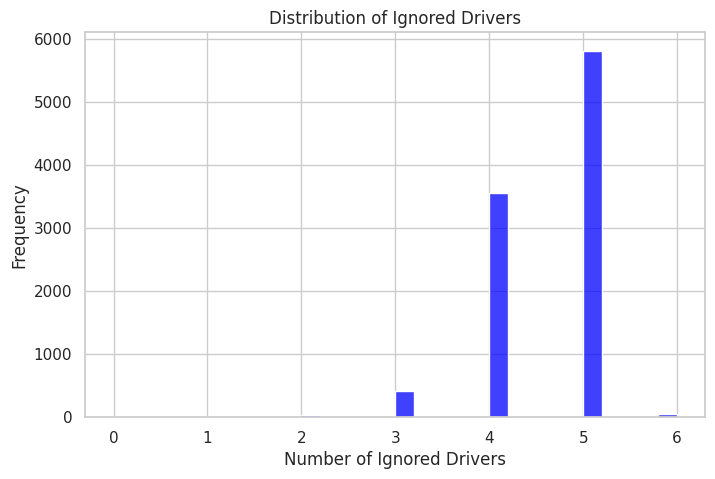

In [18]:
# Distribution of ignored drivers
plt.figure(figsize=(8, 5))
sns.histplot(df['ignored_drivers'], bins=30, kde=False, color='blue')
plt.title('Distribution of Ignored Drivers')
plt.xlabel('Number of Ignored Drivers')
plt.ylabel('Frequency')
plt.show()

In [30]:
# Create a table for the distribution of ignored drivers
ignored_drivers_distribution = df['ignored_drivers'].value_counts().reset_index()
ignored_drivers_distribution.columns = ['Number of Ignored Drivers', 'Frequency']
ignored_drivers_distribution.sort_values(by='Number of Ignored Drivers', inplace=True)
display(ignored_drivers_distribution)

,Number of Ignored Drivers,Frequency
5,0,6
6,1,5
4,2,29
2,3,424
1,4,3559
0,5,5815
3,6,56


## Booking State Distribution

<ipython-input-19-c0aa97950e42>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='booking_state', palette='viridis', order=df['booking_state'].value_counts().index)


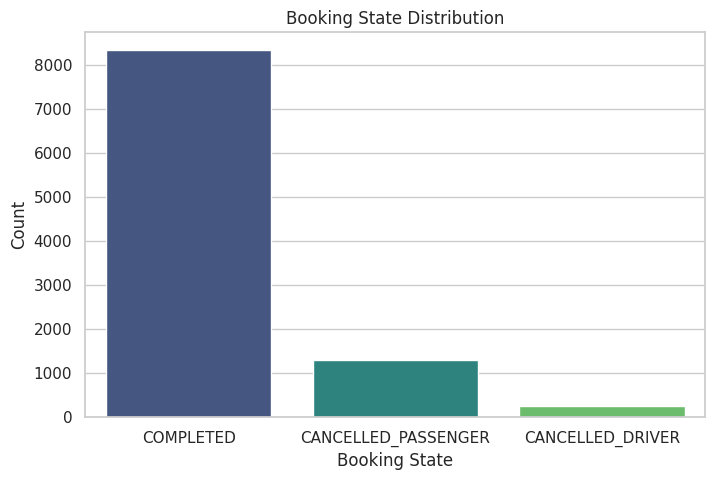

In [19]:
# Booking State Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='booking_state', palette='viridis', order=df['booking_state'].value_counts().index)
plt.title('Booking State Distribution')
plt.xlabel('Booking State')
plt.ylabel('Count')
plt.show()

## Distribution of trip distances

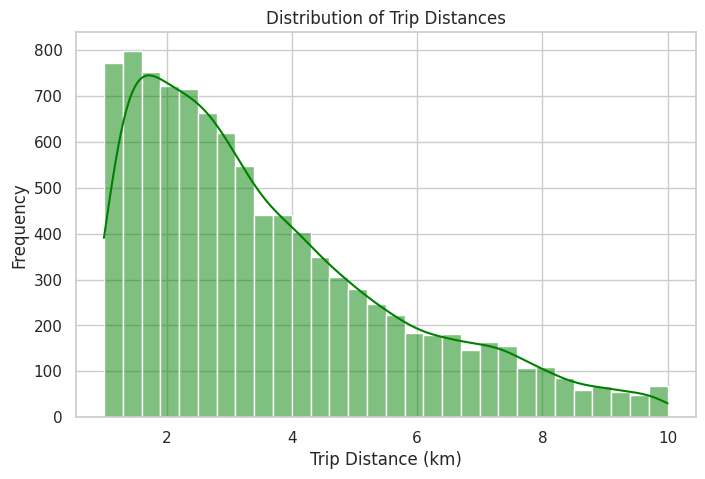

In [20]:
# Distribution of trip distances
plt.figure(figsize=(8, 5))
sns.histplot(df['trip_distance_km'], bins=30, kde=True, color='green')
plt.title('Distribution of Trip Distances')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Frequency')
plt.show()

# Driver Incentives vs Ignored Drivers


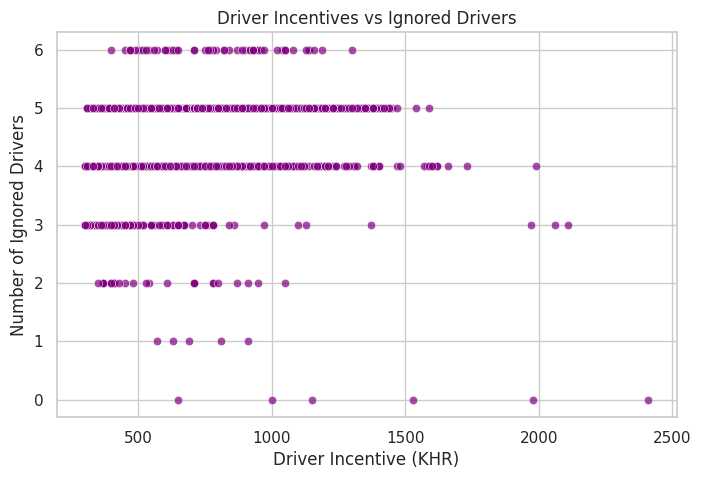

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='driver_incentive_khr', y='ignored_drivers', alpha=0.7, color='purple')
plt.title('Driver Incentives vs Ignored Drivers')
plt.xlabel('Driver Incentive (KHR)')
plt.ylabel('Number of Ignored Drivers')
plt.show()

# Factors Leading to Ignored Bookings

## Correlation matrix

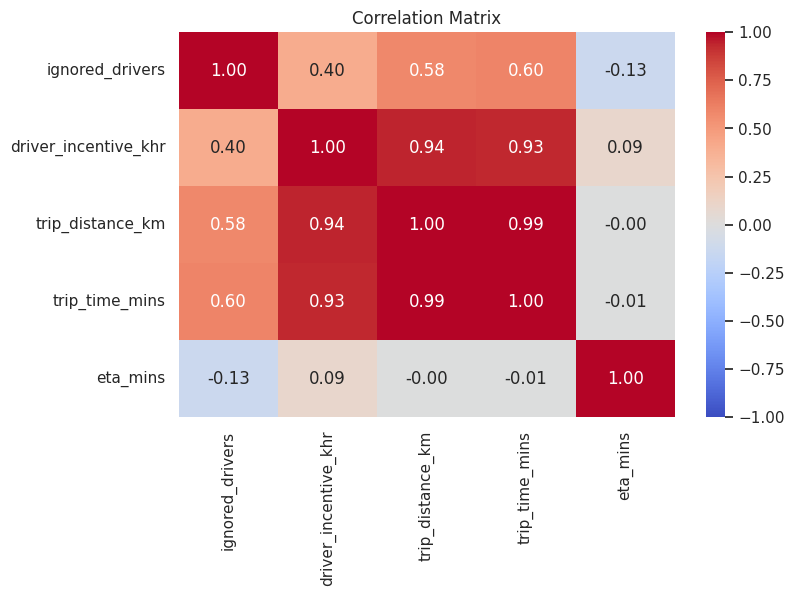

In [22]:
# Correlation matrix
correlation = df[['ignored_drivers', 'driver_incentive_khr', 'trip_distance_km', 'trip_time_mins', 'eta_mins']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Factors Leading to Booking Cancellations


## Analyze booking states with numerical features


<ipython-input-23-4c808264f641>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cancellation_data, x='booking_state', y='eta_mins', palette='pastel')


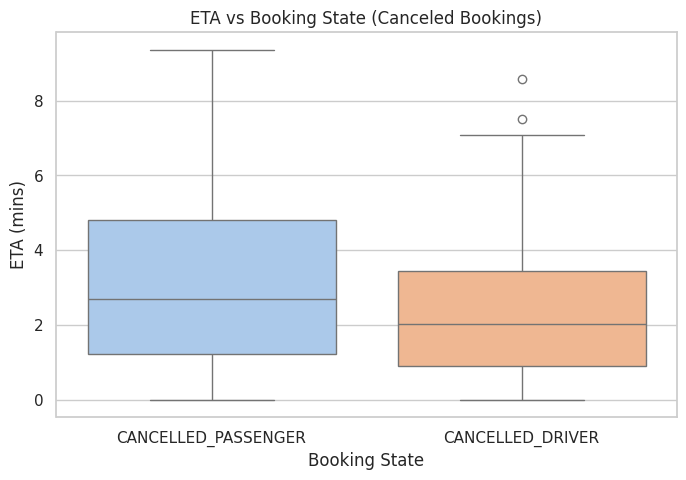

In [23]:
# Analyze booking states with numerical features
cancellation_data = df[df['booking_state'] != 'COMPLETED']
plt.figure(figsize=(8, 5))
sns.boxplot(data=cancellation_data, x='booking_state', y='eta_mins', palette='pastel')
plt.title('ETA vs Booking State (Canceled Bookings)')
plt.xlabel('Booking State')
plt.ylabel('ETA (mins)')
plt.show()

## Relationship between trip distance and cancellations

<ipython-input-24-dc2bc86b352d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cancellation_data, x='booking_state', y='trip_distance_km', palette='muted')


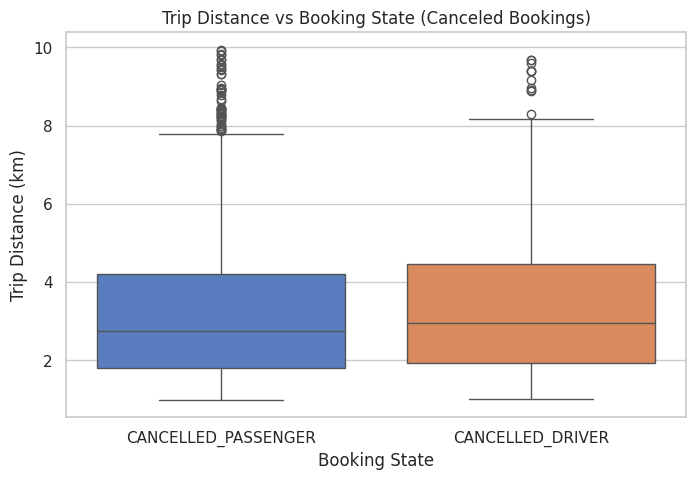

In [24]:
# Relationship between trip distance and cancellations
plt.figure(figsize=(8, 5))
sns.boxplot(data=cancellation_data, x='booking_state', y='trip_distance_km', palette='muted')
plt.title('Trip Distance vs Booking State (Canceled Bookings)')
plt.xlabel('Booking State')
plt.ylabel('Trip Distance (km)')
plt.show()

## Ignored Drivers by Booking State

<ipython-input-25-615257494bba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cancellation_data, x='booking_state', y='ignored_drivers', palette='coolwarm')


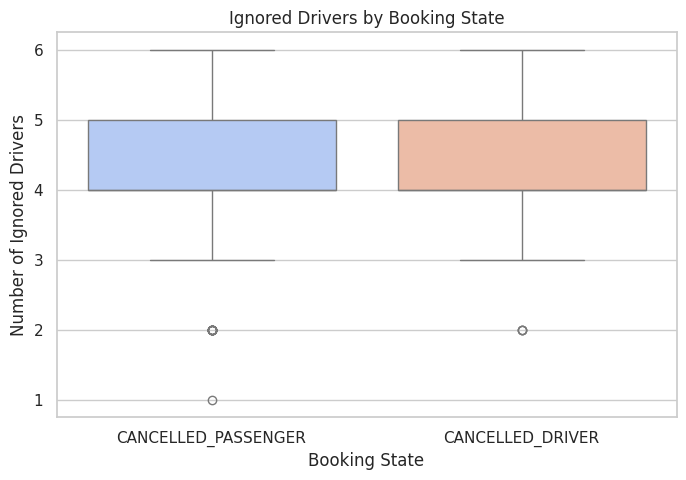

In [25]:
# Ignored Drivers by Booking State
plt.figure(figsize=(8, 5))
sns.boxplot(data=cancellation_data, x='booking_state', y='ignored_drivers', palette='coolwarm')
plt.title('Ignored Drivers by Booking State')
plt.xlabel('Booking State')
plt.ylabel('Number of Ignored Drivers')
plt.show()

#Recommendations based on results

In [27]:
# Create a summary table for statistical insight
summary = df.groupby('booking_state')[['ignored_drivers', 'trip_distance_km', 'eta_mins']].mean()
summary = summary.rename(columns={'ignored_drivers': 'Mean Ignored Drivers',
                                   'trip_distance_km': 'Mean Trip Distance (km)',
                                   'eta_mins': 'Mean ETA (mins)'})
summary = summary.round(2)
summary

,Mean Ignored Drivers,Mean Trip Distance (km),Mean ETA (mins)
booking_state,,,
CANCELLED_DRIVER,4.35,3.52,2.44
CANCELLED_PASSENGER,4.26,3.28,3.05
COMPLETED,4.60,3.67,1.88
